In [43]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, BatchNormalization

In [44]:
le = LabelEncoder()
images = []
labels = []

training_paths = ['data/raw/character_set1/training_data/',]
#testing_path = 'data/raw/character_set1/testing_data/'

In [45]:
window_width = 200
window_height = 200

for training_path in training_paths:
    dir_list = os.listdir(training_path)
    for i in dir_list:
        dir = os.path.join(training_path, i)
        file_list = os.listdir(dir)
        round = 0
        for j in file_list:
            files = os.path.join(dir, j)
            img = cv2.imread(files)
            
            # Step 1: Detect regions of characters
            # gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # _, thresh = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY_INV)  # Binary inverse threshold
            # contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            # Step 2: Sort the regions
            # sorted_contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])  # Sort by x-coordinate
            
            # Create a mask to visualize sorted regions
            # mask = np.zeros_like(img)
            # for contour in sorted_contours:
            #     x, y, w, h = cv2.boundingRect(contour)
            #     mask[y:y+h, x:x+w] = img[y:y+h, x:x+w]
            
            # Optional: Draw rectangles on the original image for visualization
            # debug_image = img.copy()  # Convert to color for rectangle drawing
            # for contour in sorted_contours:
            #     x, y, w, h = cv2.boundingRect(contour)
            #     cv2.rectangle(debug_image, (x, y), (x+w, y+h), (0, 255, 0), 1)  # Draw green rectangles
            
            # Visualization: Preview the region 3 times
            if round < 1:
                cv2.namedWindow("Preview of Detected Region", cv2.WINDOW_NORMAL)  # Create a resizable window
                cv2.resizeWindow("Preview of Detected Region", window_width, window_height)
                cv2.imshow("Preview of Detected Region", img)  # Show debug image with rectangles
                cv2.waitKey(1000)  # Display for 3000 ms (3 seconds)
            
            cv2.destroyAllWindows()  # Close preview windows after showing
            
            # Pad the mask image before resizing
            # padding = 2
            # padded_img = cv2.copyMakeBorder(mask, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=(0, 0, 0))
            
            # Proceed to further processing
            processed_img = cv2.resize(img, (64, 64))
            processed_img = np.array(processed_img, dtype=np.float32)
            processed_img = processed_img / 255.0  # Normalize to [0, 1]
            
            images.append(processed_img)
            labels.append(i)
            
            round += 1

## Print out details of X and y

In [46]:
X = np.array(images)
print("len(X): ",len(X))
print("X.shape: ", X.shape)

y = np.array(labels)
print("len(y): ",len(y))
print("y.shape: ", y.shape)

len(X):  20628
X.shape:  (20628, 64, 64, 3)
len(y):  20628
y.shape:  (20628,)


In [47]:
le = LabelEncoder()
y = le.fit_transform(y)
X_sh, y_sh = shuffle(X, y, random_state=42)

In [48]:
# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_sh, y_sh, test_size=0.2, random_state=42, stratify=y_sh
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 16502
Testing samples: 4126


# Create Keras model
create a neural network model

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=256, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=len(le.classes_), activation='softmax')  # Dynamic output units
])


c:\Users\KISEKI\anaconda3\envs\tensor_flow\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 66s 121ms/step - accuracy: 0.4189 - loss: 2.2689 - val_accuracy: 0.8725 - val_loss: 0.4503
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 63s 122ms/step - accuracy: 0.8532 - loss: 0.4791 - val_accuracy: 0.9244 - val_loss: 0.2655
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 63s 121ms/step - accuracy: 0.9002 - loss: 0.3156 - val_accuracy: 0.9295 - val_loss: 0.2076
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 62s 121ms/step - accuracy: 0.9183 - loss: 0.2607 - val_accuracy: 0.9295 - val_loss: 0.2179
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 61s 119ms/step - accuracy: 0.9255 - loss: 0.2300 - val_accuracy: 0.9426 - val_loss: 0.1768
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 62s 120ms/step - accuracy: 0.9374 - loss: 0.1938 - val_accuracy: 0.8943 - val_loss: 0.4234
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 65s 126ms/step - accuracy: 0.9394 - loss: 0.1897 - val_accuracy: 0.9455 - val_loss: 0.1886
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 61s 118ms/step - accuracy: 0.9427 - loss: 0

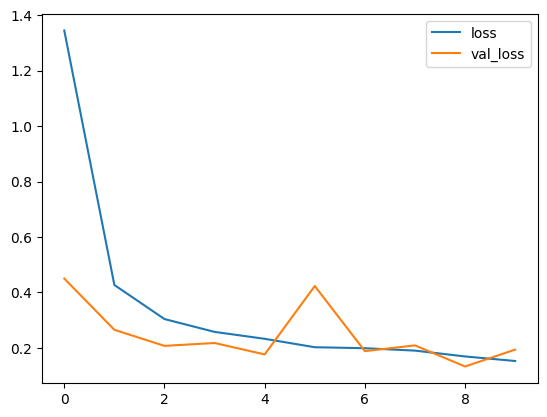

In [51]:
history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=32, epochs=10)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [52]:
# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Separate Evaluation for Uppercase and Lowercase Characters

# Determine the number of uppercase letters
# This assumes that the first 'num_uppercase' classes are uppercase letters
# Adjust 'num_uppercase' based on your actual label encoding
# num_uppercase = 26  # Typically, A-Z

# Find indices for uppercase and lowercase characters
# uppercase_indices = np.where(y_test < num_uppercase)
# lowercase_indices = np.where(y_test >= num_uppercase)

# Evaluate the model on uppercase characters
# test_loss_upper, test_acc_upper = model.evaluate(X_test[uppercase_indices], y_test[uppercase_indices], verbose=0)
# print(f"Uppercase Test Loss: {test_loss_upper:.4f}")
# print(f"Uppercase Test Accuracy: {test_acc_upper:.4f}")

# Evaluate the model on lowercase characters
# test_loss_lower, test_acc_lower = model.evaluate(X_test[lowercase_indices], y_test[lowercase_indices], verbose=0)
# print(f"Lowercase Test Loss: {test_loss_lower:.4f}")
# print(f"Lowercase Test Accuracy: {test_acc_lower:.4f}")



129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9550 - loss: 0.1409
Test Loss: 0.1429
Test Accuracy: 0.9542
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9550 - loss: 0.1409
Test Loss: 0.1429
Test Accuracy: 0.9542


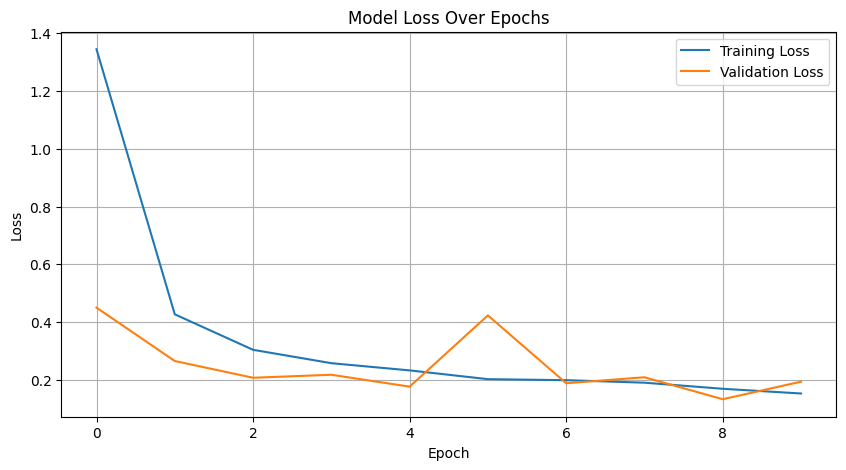

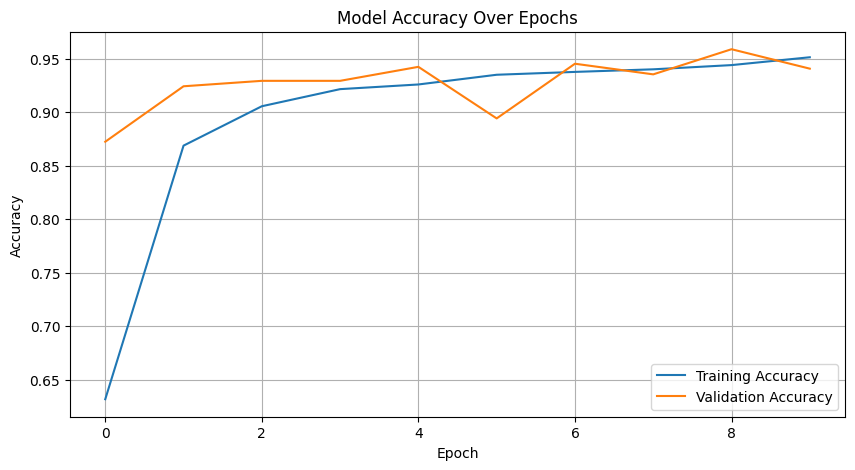

In [53]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Visualization

### Visualize Regions

In [54]:
def visualize_regions(image, regions):
    debug_image = image.copy()
    for (x, y, w, h) in regions:
        cv2.rectangle(debug_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.imshow("Detected Text Regions", debug_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### Visualize Processed Image

In [55]:
def display_processed_image(window_name, processed_image):
    cv2.imshow(window_name, processed_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Image Processing Operations

In [56]:
def image_processing_operations_visualization(image, operation):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if operation == 'threshold':
        # Apply thresholding to get a binary image
        _, processed_image = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
        window_name = "Thresholded Image"

    elif operation == 'erosion':
        # Apply thresholding and then erosion
        _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
        kernel = np.ones((2, 1), np.uint8)
        processed_image = cv2.erode(thresh, kernel, iterations=1)
        window_name = "Eroded Image"

    elif operation == 'dilation':
        # Apply thresholding and then dilation
        _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
        kernel = np.ones((2, 2), np.uint8)
        processed_image = cv2.dilate(thresh, kernel, iterations=1)
        window_name = "Dilated Image"

    else:
        raise ValueError("Operation must be 'threshold', 'erosion', or 'dilation'")

    # Display the processed image
    display_processed_image(window_name, processed_image)
    
    return _, processed_image

## Italic Characters Detection

### Compute Skew Angle

In [57]:
def compute_skew_angle(region):
    # Use moments to calculate the skew angle of a text region
    coords = np.column_stack(np.where(region > 0))
    rect = cv2.minAreaRect(coords)
    angle = rect[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    return angle

### Deskew Angle

In [58]:
def deskew_region(region, angle):
    # Rotate the region by the computed angle
    (h, w) = region.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(region, rotation_matrix, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT, borderValue=255)
    return rotated

## Detect Text Regions

In [59]:
def detect_text_regions(image):
    # Apply image processing operation (e.g., thresholding, erosion, or dilation)
    _, processed_image = image_processing_operations_visualization(image, 'threshold')
    
    # Find contours (regions of characters)
    contours, _ = cv2.findContours(processed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    regions = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        
        # region = processed_image[y:y+h, x:x+w]
        
        # Compute the skew angle of the detected region
        # angle = compute_skew_angle(region)
        
        # Deskew the region if the skew angle is significant
        # if abs(angle) > 5:  # Adjust the threshold based on your needs
        #     region = deskew_region(region, angle)
        
        # Update bounding box after deskewing (if any change occurred)
        # if abs(angle) > 5:
        #     x, y, w, h = cv2.boundingRect(region)'''
        
        # old
        # regions.append((x-1, y, w+1, h))
        
        # new
        if 0 < w < 100 and 0 < h < 100:  # Size filter
            regions.append((x, y, w, h))
    
    # Visualize the image regions
    visualize_regions(image, regions)
    
    return regions

## Sorting Bounding Boxes by Rows and Columns

In [60]:
def sort_bounding_boxes(regions):
    # Sort by `y` first (top-to-bottom) with a threshold to group by rows
    row_threshold = 20  # Adjust based on character spacing
    regions = sorted(regions, key=lambda box: box[1])

    # Group bounding boxes into rows
    rows = []
    current_row = [regions[0]]
    
    for i in range(1, len(regions)):
        if abs(regions[i][1] - current_row[-1][1]) < row_threshold:
            current_row.append(regions[i])
        else:
            rows.append(current_row)
            current_row = [regions[i]]
    rows.append(current_row)
    
    # Sort each row left-to-right
    sorted_regions = []
    for row in rows:
        sorted_row = sorted(row, key=lambda box: box[0])
        sorted_regions.extend(sorted_row)
    
    return sorted_regions


## Resize Image Operation

In [61]:
def resize_image(image, target_size=(64, 64), mode='normal'):
    if mode == 'normal':
        # Normal resize (ignores aspect ratio)
        resized_image = cv2.resize(image, target_size)
    elif mode == 'aspect_ratio':
        # Resize while maintaining aspect ratio
        (iH, iW) = image.shape[:2]
        if iW > iH:
            resized_image = cv2.resize(image, (target_size[0], int(target_size[0] * iH / iW)))
        else:
            resized_image = cv2.resize(image, (int(target_size[1] * iW / iH), target_size[1]))
        
        # After resizing, padding the image to make it exactly target_size
        (iH, iW) = resized_image.shape
        dX = int(max(0, target_size[0] - iW) / 2.0)
        dY = int(max(0, target_size[1] - iH) / 2.0)
        resized_image = cv2.copyMakeBorder(resized_image, dY, dY, dX, dX, cv2.BORDER_CONSTANT, value=[255, 255, 255])
    else:
        raise ValueError("Mode must be either 'normal' or 'aspect_ratio'")
    
    return resized_image

## Recognize Characters

In [ ]:
def recognize_characters(image, model, label_encoder):
    regions = detect_text_regions(image)
    
    sorted_regions = sort_bounding_boxes(regions)
    # print(sorted_regions)

    characters = []
    for (x, y, w, h) in sorted_regions:
        char_image = image[y:y+h, x:x+w]
        
        # Add padding
        pad = 2
        char_image = cv2.copyMakeBorder(char_image, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=[255, 255, 255])
        
        # Check if the char_image is empty
        if char_image.size == 0:
            print(f"Skipping empty character region at ({x}, {y}, {w}, {h})")
            continue  # Skip this iteration if the character image is empty
        
        # Print the shape of the character image for debugging
        print(f"Character image shape: {char_image.shape}")
        
        # Resize the character image
        char_image_resized = resize_image(char_image, target_size=(64, 64), mode='normal')
        char_image_normalized = char_image_resized / 255.0

        #cv2.imshow('image after resized',char_image_normalized)
        #cv2.waitKey(0)  # Wait indefinitely for a key press
        #cv2.destroyAllWindows() 
        
        prediction = model.predict(np.expand_dims(char_image_normalized, axis=0))
        predicted_class = np.argmax(prediction, axis=1)

        if predicted_class[0] not in range(len(label_encoder.classes_)):
            print(f"Unrecognized label: {predicted_class[0]}")
            predicted_char = "?"  # Placeholder for unrecognized labels
        else:
            predicted_char = label_encoder.inverse_transform(predicted_class)[0]
        
        #To be decided later #If the current character is 'i' or 'j' we will
        #pop the last element out (which is supposed to be the dot above small i and j)

        # ----- UNCOMMENT LATER -----
        # if predicted_char == 'i' or predicted_char == 'j'
        #     characters.pop()
        
        characters.append(predicted_char)

    return characters

# Driver Code

In [63]:
imggg = 'data/raw/character_set1/Test_3.jpg'
image = cv2.imread(imggg) 
y_pred = recognize_characters(image, model, le)
print(y_pred)
print(len(y_pred))

Character image shape: (25, 21, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Character image shape: (25, 19, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Character image shape: (25, 17, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Character image shape: (25, 17, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Character image shape: (25, 23, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Character image shape: (25, 23, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Character image shape: (25, 24, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Character image shape: (25, 21, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Character image shape: (25, 20, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Character image shape: (25, 19, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Character image shape: (25, 21, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Character image shape: (25, 18, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Character image shape: (25, 20, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Character image shape: (25, 22, 3)
1/1 ━━━━━━━━━━━